<a href="https://colab.research.google.com/github/Jinzhao-Yu/BioStat615/blob/main/BIOSTAT615_Lecture_11_Fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOSTAT615 Lecture 11 - R

## 1. Monte-Carlo Integral

Let's compute $$\int_{0}^1 x^2dx$$

using a naive Monte-Carlo integration

In [1]:
#' Monte Carlo Integral
MC.integral.v1 <- function(m,integrand,sampler){
  x = sampler(m)
  r = mean(integrand(x))
  return(r)
}

In [2]:
MC.integral.v1(10, function(x) x*x, runif)

[1] 0.331313

In [3]:
MC.integral.v1(1000, function(x) x*x, runif)

[1] 0.3337759

In [4]:
MC.integral.v1(100000, function(x) x*x, runif)

[1] 0.3336785

## 2. Accept-Reject Monte-Carlo integration

Let's compute $$\int_{0}^1 \sqrt{1-x^2}dx$$

using a accept-reject Monte-Carlo integration method

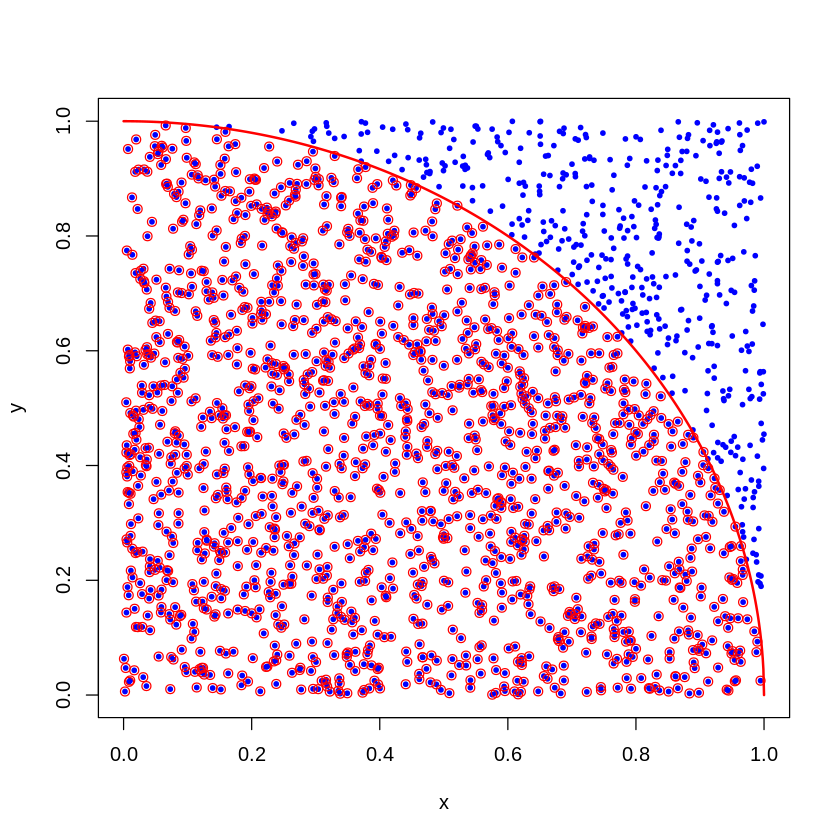

In [5]:
n = 2000; x = runif(n); y = runif(n)
idx = which(x*x+y*y < 1)
plot(x, y, col="blue", pch=19, cex=0.5) ## plot all points
points(x[idx],y[idx],col="red")     ## plot accepted points
x = seq(0,1,length=1000)
lines(x,sqrt(1-x*x),lwd=2,col="red") ## draw f(x)

In [6]:
#' Accept-Reject Monte Carlo Integral
ar.MC.v1 <- function(m, fn){
  x = runif(m)
  y = runif(m)
  return(sum(y < fn(x))/m)
}

In [7]:
f1 = function(x) sqrt(1-x*x)
df = data.frame(n=NULL,avg.MC=NULL,ar.MC=NULL,ans=NULL)
for (n in c(10,100,1000,10000,100000,1000000)) {
  r1 = MC.integral.v1(n, f1, runif)
  r2 = ar.MC.v1(n, f1)
  df = rbind(df, data.frame(n=n,avg.MC=r1,ar.MC=r2,ans=pi/4))
}
print(df)

      n    avg.MC    ar.MC       ans
1 1e+01 0.8271272 0.900000 0.7853982
2 1e+02 0.7574098 0.810000 0.7853982
3 1e+03 0.7816661 0.824000 0.7853982
4 1e+04 0.7874583 0.786800 0.7853982
5 1e+05 0.7849627 0.787140 0.7853982
6 1e+06 0.7855782 0.785302 0.7853982


##     3. Accept-Reject Monte-Carlo integration with arbitrary range


Compute 

$$ \textrm{E}\left(e^X | X \ge t\right) = \sqrt{e}\left[1-\Phi^{-1}(t-1)\right] $$

when $X \sim N(0,1)$, using accept-reject Monte-Carlo methods.

In [8]:
#' Accept-reject Monte-Carlo integration with arbitrary range
#' @param n - number of random samples
#' @param fn - function to integrate
#' @param xmin, xmax - range of x
#' @param ymax - max value of y 
#' @return MC integration of fn
ar.MC.v2 = function(n, fn, xmin, xmax, ymax) {
  x = runif(n, xmin, xmax)
  y = runif(n, 0, ymax)
  R = sum(y < fn(x))/n  # accept ratio
  return( (xmax-xmin)*ymax*R )
}

In [9]:
ar.MC.v2(1e6, dnorm, -10, 10, 0.5) # sanity check : 1.0 expected

[1] 1.00374

In [10]:
t = 5   # compute E(e^X|X>=t) with t=5
W = 10  # bound x to [-W, W]
ft = function(x) ifelse(x > t, exp(x)*dnorm(x), 0) # target function
# we know that the true answer 
print(paste0("true answer : ",exp(0.5)*pnorm(t-1,lower.tail = FALSE)))
# allow x to be in [-W, W]
print(paste0("AR MC 1     : ",ar.MC.v2(5e5, ft, -W, W, sqrt(0.5))))
# more precise range of x and y to avoid wasted random points
print(paste0("AR MC 2     : ",ar.MC.v2(5e5, ft, t, W, dnorm(t) * exp(t))))

[1] "true answer : 5.22170500797525e-05"
[1] "AR MC 1     : 2.82842712474619e-05"
[1] "AR MC 2     : 5.18392149476813e-05"


## 4. Naive Monte-Carlo integration with arbitrary range

We still want to compute 

$$ \textrm{E}\left(e^X | X \ge t\right) = \int_{-\infty}^{\infty} e^X I(X \ge t) \phi(x) dx $$

where $\phi(x)$ is a pdf of $N(0,1)$. Then, a naive Monte-Carlo integration with uniform sampler can be written as

$$\frac{1}{B}\sum_{i=1}^{B} e^{U_i}I(U_i\ge t)\phi(U_i)$$

if $U_i \sim \textrm{Uniform}(m,M)$.


In [11]:
#' Naive Monte-Carlo integration with arbitrary range
#' @param n - number of random samples
#' @param fn - function to integrate
#' @param xmin, xmax - range of x
#' @return MC integration of fn 
naive.MC.v2 = function(n, fn, xmin, xmax) {
  x = runif(n, xmin, xmax)
  return( (xmax-xmin)*mean(fn(x)) )
}

In [12]:
print(paste0("true answer : ",exp(0.5)*pnorm(t-1,lower.tail = FALSE)))
# accept-reject simulation with 1,000 random samples with precise range
print(paste0("AR MC 2     : ",ar.MC.v2(1000, ft, t, W, dnorm(t) * exp(t))))
# Naive MC without precise range
print(paste0("Naive MC 1  : ",naive.MC.v2(1000, ft, -W, W)))
# Avoid wasting simulations by requiring x >= t
print(paste0("Naive MC 2  : ",naive.MC.v2(1000, ft, t, W)))

[1] "true answer : 5.22170500797525e-05"
[1] "AR MC 2     : 6.17816471667267e-05"
[1] "Naive MC 1  : 4.32153010240743e-05"
[1] "Naive MC 2  : 3.90757423770771e-05"


* Do you think accept-reject Monte-Carlo integration is better, or naive Monte-Carlo integration is better?
* What are the differences between two naive MC methods above? 

## 5. Monte Carlo integration from sampling distribution


Now, consider calculating

$$ \textrm{E}\left(e^X | X \ge t\right) = \int_{-\infty}^{\infty} e^X I(X \ge t) \phi(x) dx $$

where $\phi(x)$ is a pdf of $N(0,1)$. Then, a Monte-Carlo integration with non-uniform sampler can be written as

$$\frac{1}{B}\sum_{i=1}^{B} e^{X_i}I(X_i\ge t)$$

if $X_i \sim N(0,1)$.

In [13]:
#' Monte-Carlo integration with non-uniform sampler
#' @param n - number of random samples
#' @param fn - function to integrate
#' @param sampler - sampler of random variables
#' @return MC integration of fn * pdf(sampler)
nonunif.MC.v2 = function(n, fn, sampler) {
  x = sampler(n)
  return( mean(fn(x)) )
}

In [14]:
# target function without normal density
gt = function(x) ifelse(x > t, exp(x), 0)
 
print(paste0("true answer : ",exp(0.5)*pnorm(t-1,lower.tail = FALSE)))
# non-uniform simulation with 1K ~ 100M random samples with precise range
print(paste0("non-unif MC (n=1e3) : ",nonunif.MC.v2(1e3, gt, rnorm)))
print(paste0("non-unif MC (n=1e5) : ",nonunif.MC.v2(1e5, gt, rnorm)))
print(paste0("non-unif MC (n=1e7) : ",nonunif.MC.v2(1e7, gt, rnorm)))
print(paste0("non-unif MC (n=1e8) : ",nonunif.MC.v2(1e8, gt, rnorm)))

[1] "true answer : 5.22170500797525e-05"
[1] "non-unif MC (n=1e3) : 0"
[1] "non-unif MC (n=1e5) : 0"
[1] "non-unif MC (n=1e7) : 0.000111637366085168"
[1] "non-unif MC (n=1e8) : 6.30366580059013e-05"


## 6. Monte-Carlo integration with important sampler

When calculating

$$ \textrm{E}\left(e^X | X \ge t\right) = \int_{-\infty}^{\infty} e^X I(X \ge t) \phi(x) dx $$

For arbitrary function $q(x)$, we can rewrite the integral as

$$ \textrm{E}\left(e^X | X \ge t\right) = \int_{-\infty}^{\infty} \frac{e^X I(X \ge t) \phi(x)}{q(x)} q(x) dx $$

Then, a Monte-Carlo integration with importance sampler can be written as

$$\frac{1}{B}\sum_{i=1}^{B} \frac{e^{X_i}I(X_i\ge t)\phi(X_i)}{q(X_i)}$$

if $X_i$ is sampled from a distribution represented by $q(x)$. 

In [15]:
#' Monte-Carlo integration with importance sampler
#' @param n - number of random samples
#' @param fn - target function to integrate
#' @param sampler - sampler of random variables
#' @param psampler - pdf of sampler
#' @return MC integration of fn
importance.MC.v2 = function(n, fn, sampler, psampler) {
  x = sampler(n)
  return( mean(fn(x)/psampler(x)) )
}

* Note that `fn` already contains target density to integrate (i.e. $f(x) = e^xI(x\ge t)\phi(t)$)
* If `sampler` is `runif()` and `psampler` is `dunif()`, then this is a naive Monte-Carlo integration.
* `sampler` and `psampler` must corresponds to the same distribution. Unless they are `rnorm(0,1)`, this is an importance sampler.

In [16]:
print(paste0("true answer : ",exp(0.5)*pnorm(t-1,lower.tail = FALSE)))
print(paste0("importance MC runif(n,-W,W) : ",importance.MC.v2(1e3, ft, function(x) runif(x,-W,W),function(x) dunif(x,-W,W))))
print(paste0("importance MC runif(n,t,W)  : ",importance.MC.v2(1e3, ft, function(x) runif(x,t,W),function(x) dunif(x,t,W))))
print(paste0("importance MC rexp(n,1)+t   : ",importance.MC.v2(1e3, ft, function(x) rexp(x,1)+t,function(x) dexp(x-t,1))))
print(paste0("importance MC rnorm(n)+t    : ",importance.MC.v2(1e3, ft, function(x) rnorm(x)+t,function(x) dnorm(x-t))))

[1] "true answer : 5.22170500797525e-05"
[1] "importance MC runif(n,-W,W) : 7.51590942944021e-05"
[1] "importance MC runif(n,t,W)  : 5.6900407589248e-05"
[1] "importance MC rexp(n,1)+t   : 5.04745327015272e-05"
[1] "importance MC rnorm(n)+t    : 5.70200056634561e-05"


## 7. Evaluating the choice of the importance function


In [17]:
#' Calculate bias, variance, and MSE of importance-sampling MC integration
#' @param nrep - Number of repetitions of MC integration
#' @param n - Number of random samples per run
#' @param trueAns - Expected value of estimate
#' @param fn - target function
#' @param sampler - random sample generator for importance sampling
#' @param psampler - density function of importance sampler
#' @return List containing (1) bias (2) var (3) MSE
mse.importance.MC = function(nrep, n, trueAns, fn, sampler, psampler) {
  res = numeric(length=nrep)  
  for(i in 1:nrep) {
    res[i] = importance.MC.v2(n, fn, sampler, psampler)
  }
  bias = mean(res)-trueAns
  vars = var(res)
  return(list(bias=bias,var=vars,mse=bias^2+vars))
}

In [18]:
theta = exp(0.5)*pnorm(t-1,lower.tail = FALSE)

In [19]:
print(mse.importance.MC(1e3, 1e3, theta, ft, function(x) runif(x,t,W),function(x) dunif(x,t,W)))

$bias
[1] -3.987834e-07

$var
[1] 2.751397e-11

$mse
[1] 2.7673e-11



In [20]:
print(mse.importance.MC(1e3, 1e3, theta, ft, function(x) rexp(x,1)+t,function(x) dexp(x-t,1)))

$bias
[1] -1.257718e-08

$var
[1] 3.880558e-12

$mse
[1] 3.880717e-12



In [21]:
print(mse.importance.MC(1e3, 1e3, theta, ft, function(x) rnorm(x)+t,function(x) dnorm(x-t)))

$bias
[1] -9.55648e-08

$var
[1] 1.274442e-11

$mse
[1] 1.275356e-11



In [22]:
install.packages("truncnorm") # use trunnorm package for sampling
library(truncnorm)
print(mse.importance.MC(1e3, 1e3, theta, ft, function(x) rtruncnorm(x,a=t), function(x) dtruncnorm(x,a=t)))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$bias
[1] 5.473437e-09

$var
[1] 1.367361e-13

$mse
[1] 1.36766e-13



In [23]:
print(mse.importance.MC(1e3, 1e3, theta, ft, function(x) rtruncnorm(x,a=t-1)+1, function(x) dtruncnorm(x-1,a=t-1)))

$bias
[1] 2.710505e-20

$var
[1] 4.228661e-42

$mse
[1] 7.389126e-40

